## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (可善用 google colab)，比較使用 CPU 與 GPU 的訓練速度

In [2]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

Wed Mar 30 15:08:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.23       Driver Version: 511.23       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8    N/A /  N/A |   3032MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import os
from tensorflow import keras

# 本範例使用 GPU, 將 GPU 設定為 "0"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [11]:
## 資料前處理
from sklearn.preprocessing import MinMaxScaler

def preproc_x(x, flatten=True):
    if flatten:
        x = x.reshape((len(x), -1))
    #搭配最大最小化 0~1 間
    MMEncoder = MinMaxScaler()
    x = MMEncoder.fit_transform(x)
    return x

#  min/max 進行標準化至 -1 ~ 1 間
# def preproc_x(x, flatten=True):
#     x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5)
#     if flatten:
#         x = x.reshape((len(x), -1))
#     return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [10]:
#x_train.shape

(50000, 32, 32, 3)

In [12]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
x_train.shape

(50000, 3072)

In [15]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 64, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 hidden_layer4 (Dense)       (None, 128)               16512     
                                                                 
 hidden_layer5 (Dense)       (None, 64)                8256      
                                                                 
 hidden_layer6 (Dense)       (None, 64)                4160  

In [16]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [17]:
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [18]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 7s 14ms/step - loss: 2.0430 - accuracy: 0.2340 - val_loss: 1.9216 - val_accuracy: 0.2913
Epoch 2/100
196/196 [==============================] - 2s 10ms/step - loss: 1.7748 - accuracy: 0.3546 - val_loss: 1.7186 - val_accuracy: 0.3822
Epoch 3/100
196/196 [==============================] - 2s 9ms/step - loss: 1.6914 - accuracy: 0.3895 - val_loss: 1.6879 - val_accuracy: 0.3933
Epoch 4/100
196/196 [==============================] - 2s 10ms/step - loss: 1.6281 - accuracy: 0.4163 - val_loss: 1.5996 - val_accuracy: 0.4246
Epoch 5/100
196/196 [==============================] - 2s 10ms/step - loss: 1.5706 - accuracy: 0.4370 - val_loss: 1.5661 - val_accuracy: 0.4304
Epoch 6/100
196/196 [==============================] - 2s 10ms/step - loss: 1.5180 - accuracy: 0.4547 - val_loss: 1.5451 - val_accuracy: 0.4446
Epoch 7/100
196/196 [==============================] - 2s 9ms/step - loss: 1.4932 - accuracy: 0.4628 - val_loss: 1.5388 - val_accuracy: 0

Epoch 58/100
196/196 [==============================] - 2s 9ms/step - loss: 0.5714 - accuracy: 0.7950 - val_loss: 2.0651 - val_accuracy: 0.5093
Epoch 59/100
196/196 [==============================] - 2s 9ms/step - loss: 0.5815 - accuracy: 0.7921 - val_loss: 1.9513 - val_accuracy: 0.5112
Epoch 60/100
196/196 [==============================] - 2s 9ms/step - loss: 0.5558 - accuracy: 0.8007 - val_loss: 2.0801 - val_accuracy: 0.5188
Epoch 61/100
196/196 [==============================] - 2s 9ms/step - loss: 0.5455 - accuracy: 0.8034 - val_loss: 2.0587 - val_accuracy: 0.5081
Epoch 62/100
196/196 [==============================] - 2s 9ms/step - loss: 0.5496 - accuracy: 0.8024 - val_loss: 2.0668 - val_accuracy: 0.5125
Epoch 63/100
196/196 [==============================] - 2s 9ms/step - loss: 0.5414 - accuracy: 0.8058 - val_loss: 2.1711 - val_accuracy: 0.5113
Epoch 64/100
196/196 [==============================] - 2s 9ms/step - loss: 0.5207 - accuracy: 0.8126 - val_loss: 2.1339 - val_accuracy:

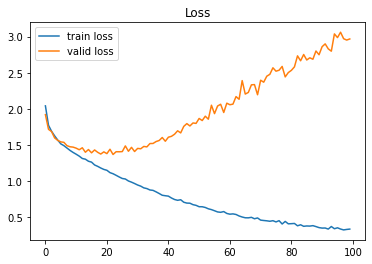

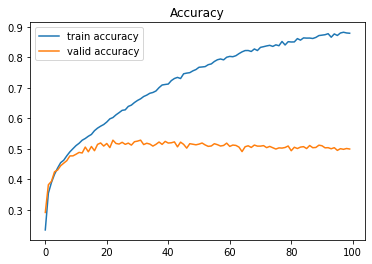

In [20]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()